<a href="https://colab.research.google.com/github/blackpearl-09/TIL/blob/main/Heart_Attack_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Attack Analysis
---







In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv
Saving heart_oversampling.csv to heart_oversampling.csv
Saving o2Saturation.csv to o2Saturation.csv
Saving Test_data.csv to Test_data.csv
Saving Train_data.csv to Train_data.csv


# 1. Data Preprocessing

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("/content/heart.csv")

In [ ]:
heart_target = df[['output']].copy()
heart_data = df.copy()
del heart_data['output']

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data info

- **age** = 나이 (Age of the patient)
- **sex** = 성별 (Sex of the patient), (1 = male; 0 = female)
- **cp** = 흉통 (Chest pain type), (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic)
- **trbps** = 안정기 혈압 (resting blood pressure (in mm Hg))
- **chol** = 콜레스테롤 수치 (cholesterol in mg/dl fetched via BMI sensor)
- **fbs** = 공복혈당 (fasting blood sugar > 120 mg/dl), (1 = true; 0 = false)
- **restecg** = 안정기 심전도 (resting electrocardiographic results), (0 = Normal; 1 = ST-T wave normality; 2 = Left ventricular hypertrophy)
- **thalachh** = 최대 심박수 (maximum heart rate achieved)
- **exng** = 운동유발성 협심증 (exercise induced angina), (1 = yes; 0 = no)
- **oldpeak** = 운동휴식 ST 하강 (ST depression induced by exercise relative to rest)
- **slp** = 운동부하 ST 분절 기울기 (the slope of the peak exercise ST segment), ( 0 = downsloping; 1 = flat; 2 = upsloping)
- **caa** = 주요 혈관 수 (Number of major vessels)
- **thall** = 탈륨 스트레스 테스트 (Thallium Stress Test result), (0 = non_test; 1 = fixed defect; 2 = normal; 3 = reversable defect)
- **output** = Target variable, (0= less chance of heart attack; 1= more chance of heart attack)

## 1.1 output 유무에 따른 양적변수 분포.

- catplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여줌
- catplot 사용목적: 한 그래프에 여러가지 변수를 표현할 수 있게 됨
- variable 즉, cp fbs exng별로 value를 시각화하면서 동시에 output 별로 나눠서 보고 싶음

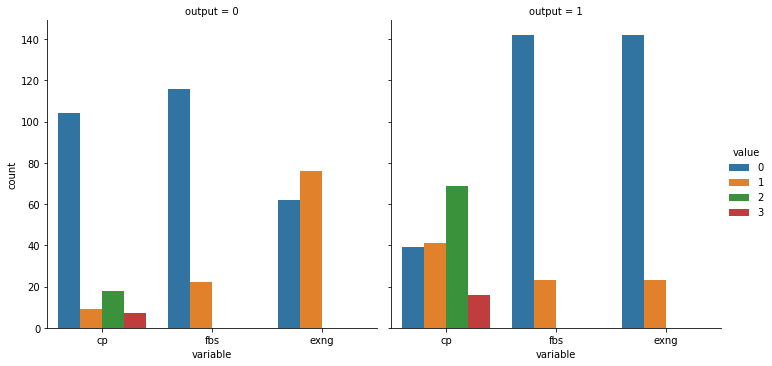

In [ ]:
df_long = pd.melt(df, id_vars=['output'], value_vars=['cp','fbs', 'exng'])
sns.catplot(x="variable", hue="value", col="output",
                data=df_long, kind="count");

- melt()는 pivot_table()과 함께 데이터 전처리 단계에서 자주 사용.

 

- melt() 는 ID 변수(id_vars)를 기준으로 원래 데이터셋에 있던 여러개의 칼럼 이름을 'variable' 칼럼에 위에서 아래로 길게 쌓아놓고, 'value' 칼럼에 ID와 variable에 해당하는 값을 넣어주는 식으로 데이터를 재구조화


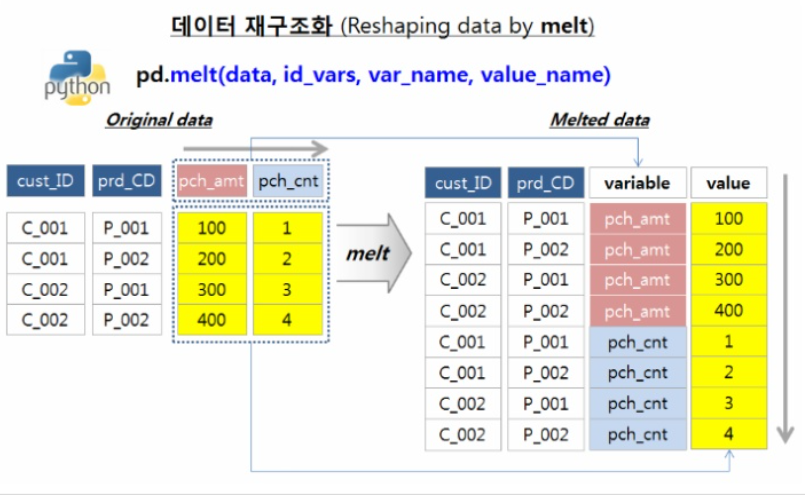

## 1.2 BMI 센서를 통해 가져온 콜레스테롤(mg/dl) -> outlier 판단

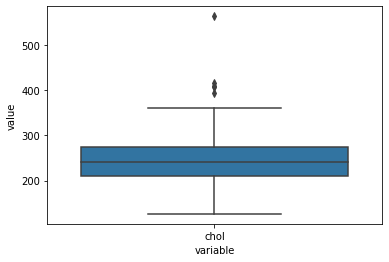

In [ ]:
chol = df.loc[:,['chol']]  #시각화를 위한 column 추출
sns.boxplot(x = 'variable',y = 'value',data = chol.melt())

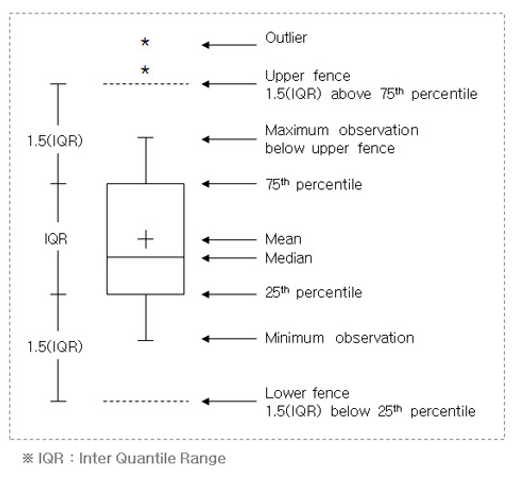

In [ ]:
df.drop(df[(df['chol'] > 500)].index,inplace=True)      # outlier 제거 #df.drop(조건문에 해당하는 index)
print("Outlier {0} cases".format(df[df['chol']>500].shape[0]))
#oulier drop

Outlier 0 cases


## 1.3. 변수간 상관관계


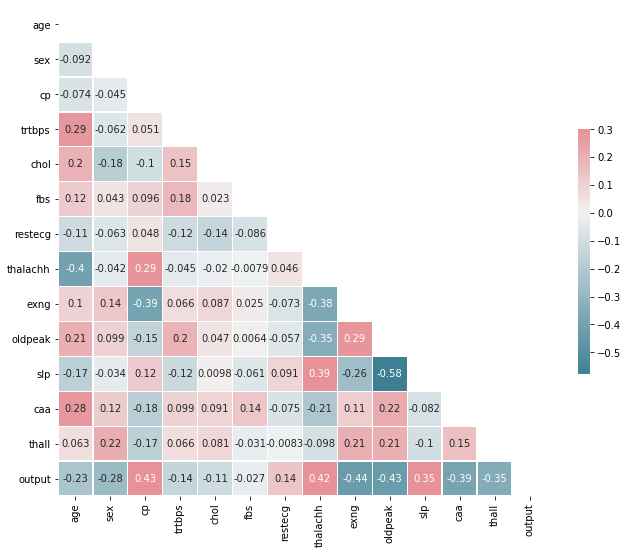

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
#흉통을 유형별로 나타낸 feature가 output에 가장 많은 영향을 주는 걸로 판단.